In [4]:
!pip install keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, _) , (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [22]:
input = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
code = layers.Dense(16, activation='relu')(encoded)

In [24]:
decoded = layers.Dense(32, activation='relu')(code)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
output = layers.Dense(784, activation='sigmoid')(decoded)

In [25]:
autoencoder = models.Model(input, output)
autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1088 - val_loss: 0.0515
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0469 - val_loss: 0.0366
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0351 - val_loss: 0.0310
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0303 - val_loss: 0.0279
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0275 - val_loss: 0.0259
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0261 - val_loss: 0.0249
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0250 - val_loss: 0.0242
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0244 - val_loss: 0.0236
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0237 - val_loss: 0.0231
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0231 - val_loss: 0.0225
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [27]:
encoder = models.Model(input, code)

In [28]:
#decoder for generating images

latent_input = layers.Input(shape=(16,))
decoder_layer = autoencoder.layers[-4](latent_input)#
for layer in autoencoder.layers[-3:]:
  decoder_layer = layer(decoder_layer)
decoder = models.Model(latent_input, decoder_layer)

In [31]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


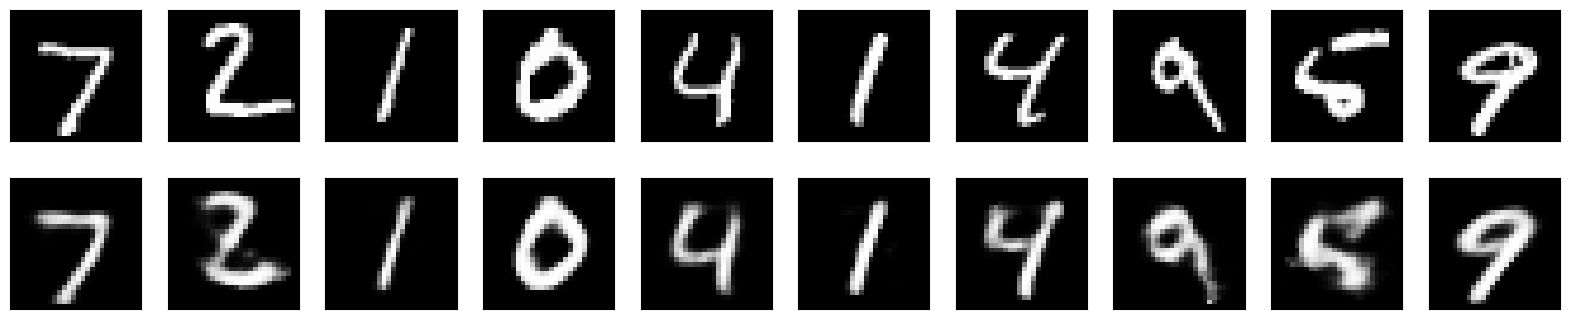

In [32]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


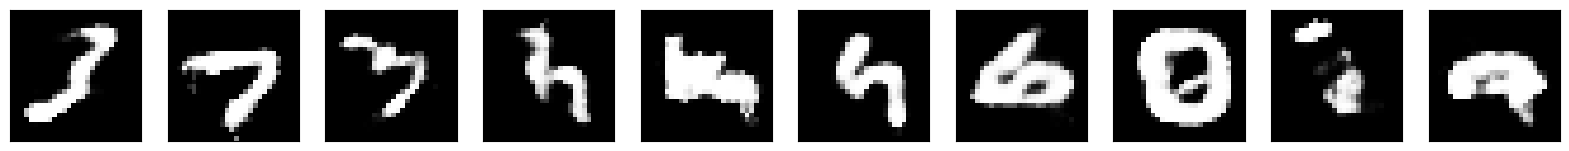

In [33]:
def generate_random_images(encoder, decoder, num_images=10):
    # Get latent space encodings from the training set
    encodings = encoder.predict(x_train)

    # Generate random latent vectors based on the range of encodings
    latent_min = np.min(encodings, axis=0)
    latent_max = np.max(
        , axis=0)

    random_latent_vectors = np.random.uniform(latent_min, latent_max, size=(num_images, encodings.shape[1]))

    # Decode the random latent vectors into images
    generated_imgs = decoder.predict(random_latent_vectors)

    # Visualize generated images
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_imgs[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Generate and visualize random images
generate_random_images(encoder, decoder)

In [34]:
from tensorflow.keras.datasets import fashion_mnist
(xtrain, _), (xtest, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

In [36]:
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))

In [38]:
fashion_input = layers.Input(shape=(784,))
f_encoded = layers.Dense(128, activation='relu')(fashion_input)
f_encoded = layers.Dense(64, activation='relu')(f_encoded)
f_encoded = layers.Dense(32, activation='relu')(f_encoded)
f_code = layers.Dense(16, activation='relu')(f_encoded)

In [39]:
f_decoded = layers.Dense(32, activation='relu')(f_code)
f_decoded = layers.Dense(64, activation='relu')(f_decoded)
f_decoded = layers.Dense(128, activation='relu')(f_decoded)
f_output = layers.Dense(784, activation='sigmoid')(f_decoded)

In [41]:
fashion_autoencoder = models.Model(fashion_input, f_output)
fashion_autoencoder.compile(optimizer='adam', loss='mse')

In [43]:
fashion_autoencoder.fit(xtrain,xtrain, epochs=50, batch_size=256, shuffle=True, validation_data=(xtest,xtest))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0883 - val_loss: 0.0310
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0281 - val_loss: 0.0235
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0230 - val_loss: 0.0216
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0192 - val_loss: 0.0188
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0187 - val_loss: 0.0183
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0182 - val_loss: 0.0179
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0178 - val_loss: 0.0175
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0174 - val_loss: 0.0172
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [44]:
fashion_encoder = models.Model(fashion_input, f_code)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


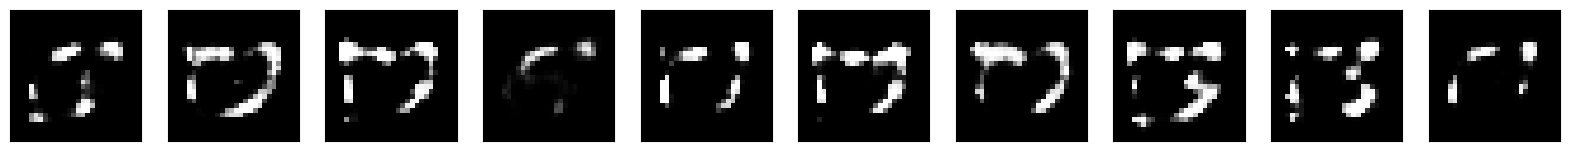

In [45]:
generate_random_images(fashion_encoder, decoder)

In [48]:
#fashion-decoder for generating images

fashion_latent_input = layers.Input(shape=(16,))
fashion_decoder_layer = fashion_autoencoder.layers[-4](fashion_latent_input)
for layer in autoencoder.layers[-3:]:
  fashion_decoder_layer = layer(fashion_decoder_layer)
fashion_decoder = models.Model(fashion_latent_input, fashion_decoder_layer)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


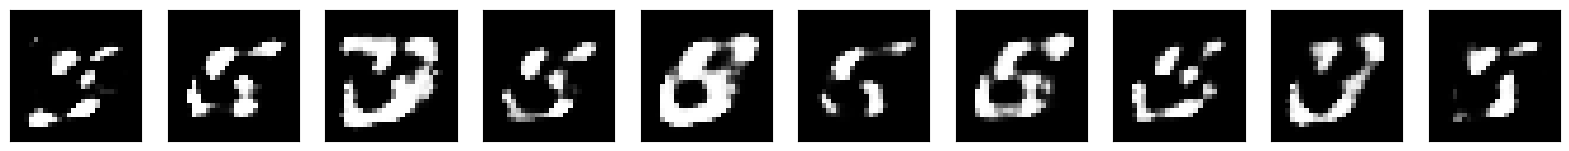

In [49]:
generate_random_images(fashion_encoder, fashion_decoder)

In [50]:
decoded_fashion_imgs = fashion_autoencoder.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


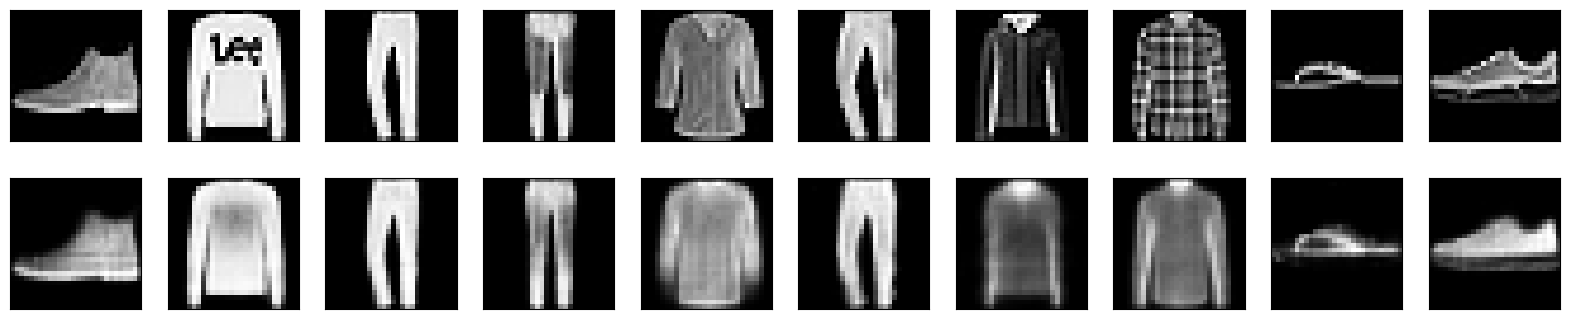

In [51]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_fashion_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()